In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import preprocessing
%matplotlib inline

In [2]:
# Linear Regression Practice

# STEP 1: Import the housing data 
housing_data = pd.read_csv("Housing_Data.csv")
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# STEP 2: Regression is used to determine the relationship between two or more variables within a dataset. We will be using the average area income, the average area house age, the average number of rooms, the average number of bedrooms and the area population to make a prediction about the pricing of houses within an area. Create two variables, x and y, to train your linear regression model.
X = housing_data[["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms" , "Avg. Area Number of Bedrooms", "Area Population"]]
y = housing_data["Price"]

In [4]:
# STEP 3: Use the appropriate scikit-learn method split your data into the segments that will be used for training and testing. Generally, 75% of your data is used for training and 25% is used to test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [5]:
# STEP 4: Create a linear regression model using the data you have manipulated and scikit-learn's LinearRegression feature.
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# STEP 5: Can you show the correlation coefficients of all the features in your model?
print(model.coef_)

[2.16429966e+01 1.65203398e+05 1.20988573e+05 1.48916540e+03
 1.49530631e+01]


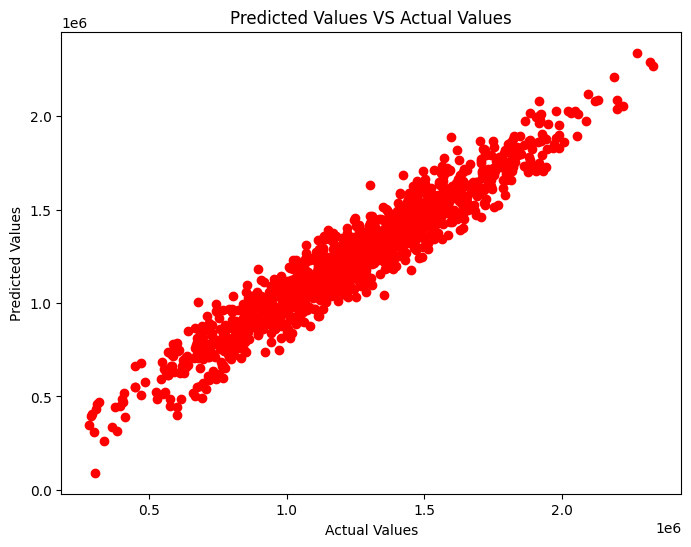

In [9]:
# STEP 6: Create a visualization (scatterplot, histogram, etc) that shows your models predictions and the actual values.

y_prediction = model.predict(X_test)

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_prediction, color="red")
plt.title("Predicted Values VS Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.show()

In [10]:
# STEP 7: To evaluate the performance of a model more than just the accuracy has to be considered. There are other metrics like the mean absolute error, the mean squared error and the r-squared error. Calculate these three metrics using scikit-learn's metrics import
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_prediction))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_prediction))
print("Coefficient of Determination: %.2f" % r2_score(y_test, y_prediction))

Mean squared error: 10368670575.40
Mean absolute error: 82366.99
Coefficient of Determination: 0.92


In [14]:
# Logistic Regression Practice

# STEP 1: Import the titanic data
titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# STEP 2: We will be using various features of the titanic data to predict whether or not a passenger survived. Create x and y variables to train your logistic regression model. 
titanic_features = titanic_data[["Pclass", "Sex", "Age", "Fare", "Embarked", "Survived"]]

print(f"Number of rows before cleaning: {titanic_features.shape[0]}")
clean_features = titanic_features.dropna()
print(f"Number of rows after cleaning: {clean_features.shape[0]}")

X = clean_features[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = clean_features["Survived"]

Number of rows before cleaning: 891
Number of rows after cleaning: 712


In [18]:
#No strings allowed

X_label_encoded = X.copy()
label_encoded = preprocessing.LabelEncoder()
columns = ["Sex", "Embarked"]

for column in columns:
    X_label_encoded[column] = label_encoded.fit_transform(X_label_encoded[column])
    
X_label_encoded

,Pclass,Sex,Age,Fare,Embarked
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,3,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,2
...,...,...,...,...,...
885,3,0,39.0,29.1250,1
886,2,1,27.0,13.0000,2
887,1,0,19.0,30.0000,2
889,1,1,26.0,30.0000,0


In [19]:
# STEP 3: Use the appropriate scikit-learn method split your data into the segments that will be used for training and testing. Generally, 75% of your data is used for training and 25% is used to test.
X_train, X_test, y_train, y_test, = train_test_split(X_label_encoded, y, test_size = 0.25)

In [20]:
# STEP 4: Create a logistic regression model using the data you have manipulated and scikit-learn's LogisticRegression feature.
Model= LogisticRegression()
Model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# STEP 5: Can you show the correlation coefficients of all the features in your model?
print(Model.coef_)

[[-1.10847406e+00 -2.30730443e+00 -3.51532525e-02 -3.34208923e-05
  -1.83225507e-01]]


In [22]:
# STEP 6: Logistic regression models are evaluated differently than linear regression models. Use the appropriate metrics features from scikit learn to create a report and a matrix for your model
y_predictions = Model.predict(X_test)

confusion_matrixs = confusion_matrix(y_test, y_predictions)
print(confusion_matrixs)

[[89 17]
 [17 55]]


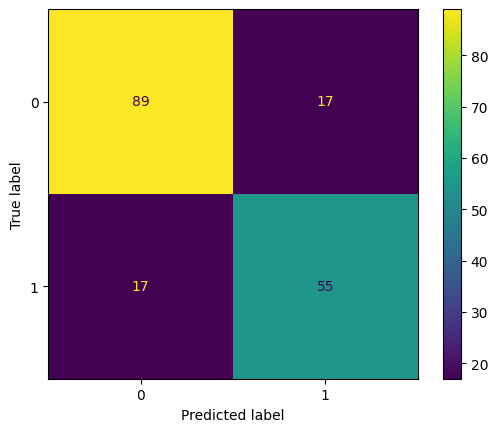

In [27]:
#Confusion Matrix Visual
confusion_matrixs_visual = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixs, display_labels = [0,1])
confusion_matrixs_visual.plot()
plt.show()

In [31]:
#Classification Report
print(classification_report(y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       106
           1       0.76      0.76      0.76        72

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

